In [33]:
import imagehash
from PIL import Image
from tqdm import tqdm
tqdm.pandas()
import json
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import itertools
from tqdm.auto import trange, tqdm

SEED = 2021
DATA_MULT = 3 # Used to define how many times more we the data to increase
main_path = "dataset/"
train_path = "train.jsonl"
dev_path = "dev_seen.jsonl"
test_path = "test_seen.jsonl"
pred_path = "model_checkpoints/Best submission so far/"
dev_pred_filename = "meme_dev_seen_preds.csv"
def get_json_list(filepath):
    json_list = pd.read_json(main_path+filepath, lines=True) 
    return json_list
def display_img(img_id):
    img_path = "dataset/img/"
    img = mpimg.imread(f"{img_path}/{id_to_img(img_id)}")
    imgplot = plt.imshow(img)
    plt.show()
def display_pair_img(img_id_1,img_id_2):
    plt.figure()
    #subplot(r,c) provide the no. of rows and columns
    f, axs = plt.subplots(1,2) 

    img_path = "dataset/img/"
    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axs[0].imshow(mpimg.imread(f"{img_path}/{id_to_img(img_id_1)}"))
    axs[1].imshow(mpimg.imread(f"{img_path}/{id_to_img(img_id_2)}"))   
    axs[0].set_title(str(img_id_1))
    axs[1].set_title(str(img_id_2))
    plt.show()
def id_to_img(img_id):
    return str(img_id).zfill(5) + ".png"

## Hash images method

In [28]:
def get_hashes_from_df_id(df_data):
    return[(i,imagehash.dhash(Image.open("dataset/img/"+id_to_img(i) ))) for i in tqdm(df_data.id)] # Dev data hash

#Read hashes from file
def read_hashed_from_file(filename='hash_imgs_dhash_default_filename.json'):
    with open(filename,'r') as filehandle:
        # print(filehandle.readline)
        similar_ids = json.load(filehandle)
    #Convert back to hashes
    hash_imgs_train = [(pair[0],imagehash.hex_to_hash(pair[1])) for pair in similar_ids]
    return hash_imgs_train

def save_hashes_to_file(hashes, filename='hash_imgs_dhash_default_filename.json'):
    saving_hash = [(hash_tuple[0],str(hash_tuple[1])) for hash_tuple in hashes] # Dev data hash

    with open(filename, 'w') as filehandle:
        json.dump(saving_hash, filehandle)
def get_pairs_repeated_images(hash_array, threshold=8):
    similar_ids = []
    for a, b in tqdm(itertools.combinations(hash_array, 2)):
        crop_diff = a[1] - b[1]

        if crop_diff < threshold:
            # print("\nHash has {} percentage difference ".format(crop_diff))
            # print("ID 1:",str(a[0]),"Labeled as:",int(train_data[train_data.id==a[0]]['label']))
            # print("ID 2:",str(b[0]),"Labeled as:",int(train_data[train_data.id==b[0]]['label']))
            # print("ID of match:",str(id_img))
            # display_pair_img(a[0],b[0])
            similar_ids.append((a[0],b[0]))
    
    print("\nDONE ",str(len(similar_ids))," repeated images found\n")
    return similar_ids

def save_pairs_similar_imgs(similar_ids, filepath):
    with open(filepath, 'w') as filehandle:
        json.dump(similar_ids, filehandle)
def load_pairs_similar_imgs(filepath):
    with open(filepath,'r') as filehandle:
        similar_ids = json.load(filehandle)
    return similar_ids

#Preview similar pairs
def preview_x_amount_pairs(list_ids_pairs, amount_to_preview = 2):    
    for sim_id in similar_ids_pairs[:amount_to_preview]:
        display_pair_img(sim_id[0],sim_id[1])
def get_ids_repeated_imgs(list_ids_pairs):
    ids_set = set()
    for tupl in list_ids_pairs:
        ids_set.add(tupl[0])
        ids_set.add(tupl[1])
    return list(ids_set)


def save_confounders_ids(confounder_ids,filepath):
    with open(filepath, 'w') as filehandle:
        json.dump(confounder_ids, filehandle)
def load_confounders_ids(filepath):
    with open(filepath,'r') as filehandle:
        confounder_ids = json.load(filehandle)
    return confounder_ids

## Load raw data

In [5]:
train_data = get_json_list(train_path)
dev_data = get_json_list(dev_path)
dev_pred = pd.read_csv(pred_path+dev_pred_filename) 
failed = dev_pred[dev_pred["label"]!=dev_pred['gt']]
# failed

In [6]:
#20568 repeated 44 times?
test_img_id = 20568
test_img_name = id_to_img(test_img_id)
full_image = Image.open("dataset/img/"+test_img_name)
full_hash = imagehash.dhash(full_image)
# display_img(test_img_id)

## DHASH

In [7]:
# hash_imgs_train = get_hashes_from_df_id(train_data) #Train data hash
# save_hashes_to_file(hash_imgs_dev,'hash_imgs_train_dhash.json' )#Train data hash
hash_imgs_train = read_hashed_from_file('hash_imgs_train_dhash.json')
similar_ids_pairs = get_pairs_repeated_images(hash_imgs_train, threshold=8) #Generate pairs of similar imgs
save_pairs_similar_imgs(similar_ids_pairs, 'similar_images_train_dhash.json') #Save pairs to file
similar_ids_pairs = load_pairs_similar_imgs('similar_images_train_dhash.json') #Load file to check it worked correcly

1326774it [00:03, 344910.92it/s]


KeyboardInterrupt: 

100%|██████████| 500/500 [00:04<00:00, 103.09it/s]
124750it [00:00, 319392.56it/s]

DONE  103  repeated images found



<Figure size 432x288 with 0 Axes>

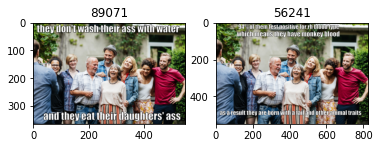

<Figure size 432x288 with 0 Axes>

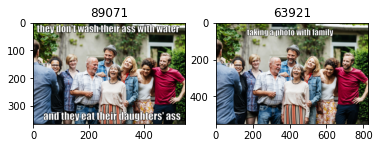

In [50]:
# hash_imgs_dev = get_hashes_from_df_id(dev_data) # Generate Dev data hash
# save_hashes_to_file(hash_imgs_dev,'hash_imgs_dev_dhash.json' ) #Save Dev data hash
# hash_imgs_dev = read_hashed_from_file('hash_imgs_dev_dhash.json')
# similar_ids_pairs = get_pairs_repeated_images(hash_imgs_dev, threshold=8) #Generate pairs of similar imgs
# save_pairs_similar_imgs(similar_ids_pairs, 'similar_images_dev_dhash.json') #Save pairs to file
# similar_ids_pairs = load_pairs_similar_imgs('similar_images_dev_dhash.json') #Load file to check it worked correcly
# preview_x_amount_pairs(similar_ids_pairs, amount_to_preview = 2) #Preview pairs

## Crop resistant hash
Even though this method is the newest, is way slower and less accurate than dhash for our case scenario.
We can see in the results below that `dhash` performs better than `cropping resistant hash`.

In [13]:
# hash_imgs_train_crop_resistant_hash = [(i,imagehash.crop_resistant_hash(Image.open("dataset/img/"+id_to_img(i) ))) for i in tqdm(train_data.id)]

100%|██████████| 8500/8500 [3:14:38<00:00,  1.37s/it]


In [14]:
# #Convert hash to hex string and save in json
# saving_crop_resistant_hash = [(hash_tuple[0],str(hash_tuple[1])) for hash_tuple in hash_imgs_train_crop_resistant_hash]
# with open('hash_imgs_train_crop_resistant.json', 'w') as filehandle:
#     json.dump(saving_crop_resistant_hash, filehandle)

In [48]:
# with open('hash_imgs_train_crop_resistant.json', 'w') as filehandle:
#     saving_crop_resistant_hash = json.load(filehandle)

58125it [00:07, 6203.53it/s]Hash has 8 matching segments with 24 total hamming distance
ID 1: 76932 Labeled as: 0
ID 2: 28563 Labeled as: 0


<Figure size 432x288 with 0 Axes>

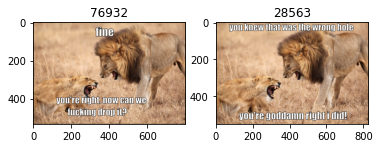

87066it [00:10, 10812.06it/s]Hash has 5 matching segments with 25 total hamming distance
ID 1: 79351 Labeled as: 1
ID 2: 26184 Labeled as: 1


<Figure size 432x288 with 0 Axes>

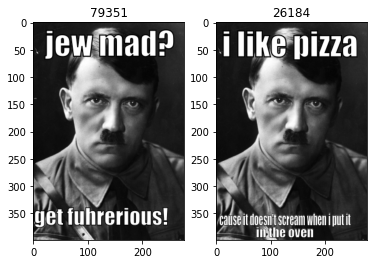

126697it [00:14, 7797.90it/s]Hash has 5 matching segments with 15 total hamming distance
ID 1: 79346 Labeled as: 0
ID 2: 73849 Labeled as: 0


<Figure size 432x288 with 0 Axes>

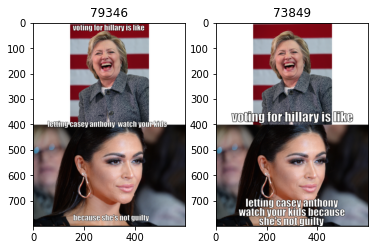

128116it [00:15, 4081.40it/s]Hash has 8 matching segments with 30 total hamming distance
ID 1: 13426 Labeled as: 0
ID 2: 9352 Labeled as: 1


<Figure size 432x288 with 0 Axes>

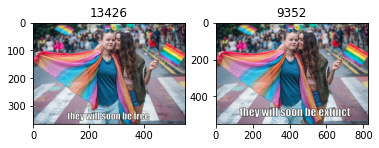

189022it [00:22, 9528.78it/s] Hash has 6 matching segments with 17 total hamming distance
ID 1: 28061 Labeled as: 0
ID 2: 97213 Labeled as: 1


<Figure size 432x288 with 0 Axes>

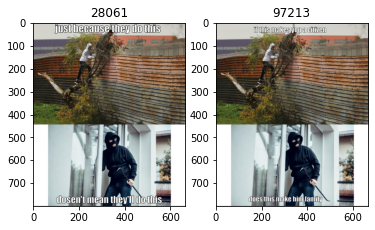

226165it [00:27, 6848.60it/s]Hash has 6 matching segments with 54 total hamming distance
ID 1: 15872 Labeled as: 1
ID 2: 53064 Labeled as: 0


<Figure size 432x288 with 0 Axes>

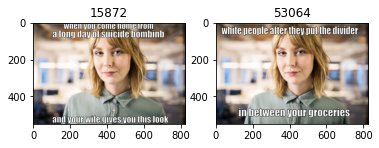

284560it [00:35, 7656.48it/s]Hash has 7 matching segments with 17 total hamming distance
ID 1: 25719 Labeled as: 0
ID 2: 48971 Labeled as: 1


<Figure size 432x288 with 0 Axes>

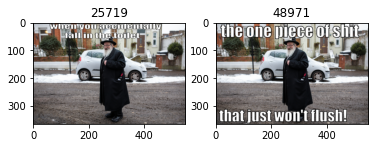

290306it [00:36, 4453.16it/s]Hash has 7 matching segments with 10 total hamming distance
ID 1: 76825 Labeled as: 0
ID 2: 12967 Labeled as: 1


<Figure size 432x288 with 0 Axes>

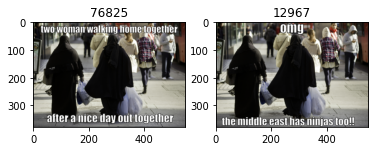

637018it [01:13, 7462.60it/s]Hash has 6 matching segments with 14 total hamming distance
ID 1: 2476 Labeled as: 0
ID 2: 34972 Labeled as: 1


<Figure size 432x288 with 0 Axes>

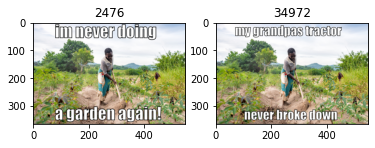

685769it [01:18, 9641.20it/s]Hash has 5 matching segments with 69 total hamming distance
ID 1: 56432 Labeled as: 0
ID 2: 30548 Labeled as: 0


<Figure size 432x288 with 0 Axes>

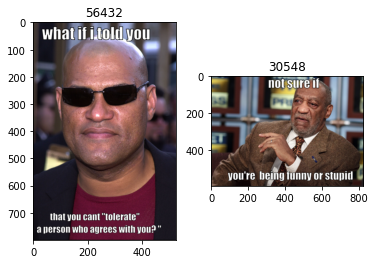

686243it [01:18, 8696.49it/s]
DONE  10  repeated images found




In [24]:
# similar_ids_crop_resistant = []
# i =0
# for a, b in tqdm(itertools.combinations(hash_imgs_train_crop_resistant_hash, 2)):
#     crop_diff = a[1].hash_diff(b[1])

#     if crop_diff[0] > 4:
#         i +=1
#         print("\n Imaged below: \nHash has {} matching segments with {} total hamming distance".format(crop_diff[0], crop_diff[1])) 
#         print("ID 1:",str(a[0]),"Labeled as:",int(train_data[train_data.id==a[0]]['label']))
#         print("ID 2:",str(b[0]),"Labeled as:",int(train_data[train_data.id==b[0]]['label']))
#         display_pair_img(a[0],b[0])
#         similar_ids_crop_resistant.append((a[0],b[0]))
#         if i >=10:break

# print("\nDONE ",str(len(similar_ids_crop_resistant))," repeated images found\n")
# with open('similar_images_dhash.json', 'w') as filehandle:
#     json.dump(similar_ids_crop_resistant, filehandle)

In [ ]:
#  display_pa ir_img(sim_id[0],sim_id[1])


## Load similarity pairs

<Figure size 432x288 with 0 Axes>

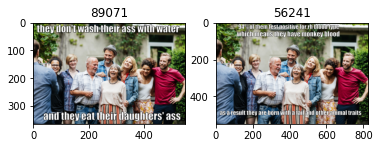

<Figure size 432x288 with 0 Axes>

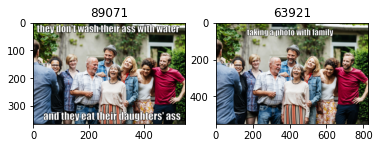

In [53]:

similar_ids_pairs = load_pairs_similar_imgs('similar_images_dev_dhash.json') #Load file to check it worked correcly
preview_x_amount_pairs(similar_ids_pairs, amount_to_preview = 2) #Preview pairs

## Find image confounders class

Get the confounders and upsample in the code below. This code is cleaner than in the actually script so might be worth to update the script

In [48]:
multiplier = 3
# read data
train_data_df = pd.read_json(main_path+dev_path, lines=True)
# Get rows with duplicated text.
duplicated_text = train_data_df[train_data_df['text'].duplicated(keep=False)]

# Explicitely get the text of the hateful memes, since some duplicated text appears only in non hateful memes.
text_confounders_label1 = duplicated_text.loc[(duplicated_text['label'] == 1)]
# Get rows of non hateful memes that contain duplicated text.
rows_label_0 = duplicated_text.loc[(duplicated_text['label'] == 0)]
text_confounders = text_confounders_label1['text'] #Text only of label 1

# Get rows with label 0 that their text appeared in hateful memes.
text_confounders_label0 = rows_label_0.loc[rows_label_0['text'].apply((lambda x: any(item for item in text_confounders if item in x)))]

len_rows_confounders_l0 = len(text_confounders_label0)
len_rows_confounders_l1 = len(text_confounders_label1)

# Create an upsample of data by sampling with replacement and reseting index
rows_confounders_upsampled_label_0 = text_confounders_label0.sample(n=len_rows_confounders_l0*multiplier, replace=True, random_state=SEED).reset_index(drop=True)
rows_confounders_upsampled_label_1 = text_confounders_label1.sample(n=len_rows_confounders_l1*multiplier, replace=True, random_state=SEED).reset_index(drop=True)

rows_confounders_upsampled_2 = pd.concat([rows_confounders_upsampled_label_0,rows_confounders_upsampled_label_1])

print("Confounders upsampled by", str(multiplier), "times. \n From", str(
len_rows_confounders_l0+len_rows_confounders_l1), " samples to", str(len(rows_confounders_upsampled_2)))
print("Upsample both parts of confounders, hateful and non hateful - option 2")

#This are the original text confounders only
text_confounders = pd.concat([text_confounders_label0, text_confounders_label1])


Confounders upsampled by 3 times. 
 From 159  samples to 477
Upsample both parts of confounders, hateful and non hateful - option 2


## Add confounder label to dataframe

In [49]:
#Get ids of confounders 
ids_text_confounders = text_confounders.id ### Need to run previous cell ###
similar_ids_pairs = load_pairs_similar_imgs('similar_images_dev_dhash.json') #Load file to check it worked correcly
ids_images_confounders = get_ids_repeated_imgs(similar_ids_pairs) 

In [50]:
dev_data.set_index('id')
dev_data['confounder_type'] = ['Other']*500
set_difference = set(ids_text_confounders) & set(ids_images_confounders)
both_type_confounders = list(set_difference)
# print(both_type_confounders)
print(len(both_type_confounders))

69


In [82]:
dev_data.loc[dev_data['id'].isin(ids_images_confounders), 'confounder_type'] = "image"
dev_data.loc[dev_data['id'].isin(ids_text_confounders), 'confounder_type'] = "text"
dev_data.loc[dev_data['id'].isin(both_type_confounders), 'confounder_type'] = "both"
dev_data.to_csv("dev_data_conf_labels_fixed.csv")
dev_data

,id,img,label,text,confounder_type
0,8291,img/08291.png,1,white people is this a shooting range,Other
1,46971,img/46971.png,1,bravery at its finest,Other
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...,Other
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...,Other
4,80243,img/80243.png,1,mississippi wind chime,Other
...,...,...,...,...,...
495,83675,img/83675.png,0,i'm gonna be like phelps one day,image
496,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...,Other
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...,text
498,9863,img/09863.png,0,diverse group of women,image


In [83]:
# # img_id, confounder type 
# confounder_class_text = dev_data.loc[dev_data['id'].apply((lambda x: any(item for item in ids_text_confounders if item in x)))]
# confounder_class_img = dev_data.loc[dev_data['id'].apply((lambda x: any(item for item in ids_images_confounders if item in x)))]
# confounder_class = pd.concat(confounder_class_text,confounder_class_img)
# confounder_class

## Upsample image confounders

In [34]:
similar_ids_pairs = load_pairs_similar_imgs('similar_images_dev_dhash.json') #Load file to check it worked correcly
ids_images_confounders = get_ids_repeated_imgs(similar_ids_pairs) 
len(similar_ids_pairs)

103

### Use a graph to find unconnected graphs from the list
This approach is based upon constructing a graph, then doing traversals on it until we run out of unvisited nodes. It should run in linear time (O(n) to construct the graph, O(n) to do all the traversals, and I believe O(n) just to do the set difference) [Ref](https://stackoverflow.com/questions/28980797/given-n-tuples-representing-pairs-return-a-list-with-connected-tuples).

In [35]:
from collections import defaultdict

def dfs(start, graph):
    """
    Does depth-first search, returning a set of all nodes seen.
    Takes: a graph in node --> [neighbors] form.
    """
    visited, worklist = set(), [start]

    while worklist:
        node = worklist.pop()
        if node not in visited:
            visited.add(node)
            # Add all the neighbors to the worklist.
            worklist.extend(graph[node])

    return visited

def graph_components(edges):
    """
    Given a graph as a list of edges, divide the nodes into components.
    Takes a list of pairs of nodes, where the nodes are integers.
    """

    # Construct a graph (mapping node --> [neighbors]) from the edges.
    graph = defaultdict(list)
    nodes = set()

    for v1, v2 in edges:
        nodes.add(v1)
        nodes.add(v2)

        graph[v1].append(v2)
        graph[v2].append(v1)

    # Traverse the graph to find the components.
    components = []

    # We don't care what order we see the nodes in.
    while nodes:
        component = dfs(nodes.pop(), graph)
        components.append(component)

        # Remove this component from the nodes under consideration.
        nodes -= component

    return components

In [36]:
same_img_sets_ids = graph_components(similar_ids_pairs)
print("Amount of unique images",len(same_img_sets_ids))
same_img_sets_ids[:5]

Amount of unique images 84


[{19243, 35840},
 {1967, 18945},
 {6273, 46082},
 {30148, 38914},
 {5126, 29174, 47263, 54206}]

In [39]:
list_unique_imgs_confounders = []
for img_set in same_img_sets_ids:
    labels = [False,False]
    for i in img_set:
        label = dev_data.loc[dev_data.id==i]['label']
        # label = train_data.loc[train_data.id==i]['label']
        labels[label.values[0]] = True
    if labels[0] == True and labels[1]==True:
        list_unique_imgs_confounders.append(list(img_set))

confounder_imgs = [item for sublist in list_unique_imgs_confounders for item in sublist]

print("Amount of confounder unique images",len(list_unique_imgs_confounders))
print("Amount of confounder img ids",len(confounder_imgs))

Amount of confounder unique images 84
Amount of confounder img ids 177


In [44]:
save_confounders_ids(confounder_imgs, 'image_confounders_id_dev_data.json')
confounder_imgs = load_confounders_ids('image_confounders_id_dev_data.json')
confounder_imgs[:5]

[35840, 19243, 18945, 1967, 6273]

In [45]:
# img_confounders = train_data.loc[train_data.id.isin(confounder_imgs)]
img_confounders = dev_data.loc[dev_data.id.isin(confounder_imgs)]

In [46]:
img_confounders_label_0 = img_confounders.loc[img_confounders.label == 0]
img_confounders_label_1 = img_confounders.loc[img_confounders.label == 1]

print("Image confounders with label 0:",str(len(img_confounders_label_0)))
print("Image confounders with label 1:",str(len(img_confounders_label_1)))

Image confounders with label 0: 88
Image confounders with label 1: 89


In [23]:
multiplier = 3
len_rows_confounders_l0 = len(img_confounders_label_0)
len_rows_confounders_l1 = len(img_confounders_label_1)

# Create an upsample of data by sampling with replacement and reseting index
rows_confounders_upsampled_label_0 = img_confounders_label_0.sample(n=len_rows_confounders_l0*multiplier, replace=True, random_state=SEED).reset_index(drop=True)
rows_confounders_upsampled_label_1 = img_confounders_label_1.sample(n=len_rows_confounders_l1*multiplier, replace=True, random_state=SEED).reset_index(drop=True)

rows_confounders_upsampled_2 = pd.concat([rows_confounders_upsampled_label_0,rows_confounders_upsampled_label_1])

print("Image confounders upsampled by", str(multiplier), "times. \n From", str(
len_rows_confounders_l0+len_rows_confounders_l1), " samples to", str(len(rows_confounders_upsampled_2)))
print("Image upsample both parts of confounders, hateful and non hateful - option 2")

#This are the original text confounders only
image_confounders = pd.concat([img_confounders_label_0, img_confounders_label_0])

Image confounders upsampled by 3 times. 
 From 2216  samples to 6648
Image upsample both parts of confounders, hateful and non hateful - option 2


### Confounders fix df

In [53]:
#Get ids of confounders 
ids_text_confounders = text_confounders.id ### Need to run previous cell ###
similar_ids_pairs = load_pairs_similar_imgs('similar_images_dev_dhash.json') #Load file to check it worked correcly
ids_images_confounders = confounder_imgs 

dev_data.set_index('id')
dev_data['confounder_type'] = ['Other']*500
set_difference = set(ids_text_confounders) & set(ids_images_confounders)
both_type_confounders = list(set_difference)
# print(both_type_confounders)
print(len(both_type_confounders))

#Fix confounders file
dev_data.loc[dev_data['id'].isin(ids_images_confounders), 'confounder_type'] = "image"
dev_data.loc[dev_data['id'].isin(ids_text_confounders), 'confounder_type'] = "text"
dev_data.loc[dev_data['id'].isin(both_type_confounders), 'confounder_type'] = "both"
dev_data.to_csv("dev_data_conf_labels_fixed.csv")
dev_data

69


,id,img,label,text,confounder_type
0,8291,img/08291.png,1,white people is this a shooting range,Other
1,46971,img/46971.png,1,bravery at its finest,Other
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...,Other
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...,Other
4,80243,img/80243.png,1,mississippi wind chime,Other
...,...,...,...,...,...
495,83675,img/83675.png,0,i'm gonna be like phelps one day,image
496,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...,Other
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...,text
498,9863,img/09863.png,0,diverse group of women,image
